In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df1= pd.read_csv('/content/drive/MyDrive/vgsales.csv')
df1.isnull().sum()  # Check missing values

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
import pandas as pd

df2= pd.read_csv('/content/drive/MyDrive/games.csv')
df2.isnull().sum()  # Check missing values

,0
Unnamed: 0,0
Title,0
Release Date,0
Team,1
Rating,13
Times Listed,0
Number of Reviews,0
Genres,0
Summary,1
Reviews,0


In [ ]:
print(df1.info())
print(df2.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1512 non-null   int64  
 1   Title    

In [ ]:
# Fill or drop missing values
df1.fillna({'Year': df1['Year'].median()}, inplace=True)
df1.dropna(subset=['Name'], inplace=True)
df2.fillna({'Rating': df2['Rating'].mean(), 'Plays': 0, 'Backlogs': 0, 'Wishlist': 0}, inplace=True)
df2.dropna(subset=['Title'], inplace=True)

In [ ]:
# Convert release date to datetime format
df2['Release Date'] = pd.to_datetime(df2['Release Date'], errors='coerce')
df2['Release Year'] = df2['Release Date'].dt.year

# Normalize column names
df2.columns = [col.strip().lower().replace(" ", "_") for col in df2.columns]
df1.columns = [col.strip().lower().replace(" ", "_") for col in df1.columns]

In [ ]:
# Print columns of both dataframes before merging to verify names
print("Columns of df2:", df2.columns)
print("Columns of df1:", df1.columns)


Columns of df2: Index(['unnamed:_0', 'title', 'release_date', 'team', 'rating', 'times_listed',
       'number_of_reviews', 'genres', 'summary', 'reviews', 'plays', 'playing',
       'backlogs', 'wishlist', 'release_year'],
      dtype='object')
Columns of df1: Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')


In [ ]:
merged_df = pd.merge(df2, df1, left_on='title', right_on='name', how='inner')

In [ ]:
df2.to_csv("cleaned_games.csv", index=False)
df1.to_csv("cleaned_sales.csv", index=False)
merged_df.to_csv("merged_data.csv", index=False)

In [ ]:
print(df2.columns)

Index(['unnamed:_0', 'title', 'release_date', 'team', 'rating', 'times_listed',
       'number_of_reviews', 'genres', 'summary', 'reviews', 'plays', 'playing',
       'backlogs', 'wishlist', 'release_year'],
      dtype='object')


In [ ]:
# This cell creates the merged_df variable
merged_df = pd.merge(df2, df1, left_on='title', right_on='name', how='inner')

# This cell saves the dataframes to CSV files in the current directory
df2.to_csv("cleaned_games.csv", index=False)
df1.to_csv("cleaned_sales.csv", index=False)
merged_df.to_csv("merged_data.csv", index=False)

# This cell downloads the created files
from google.colab import files
files.download('cleaned_games.csv')
files.download('cleaned_sales.csv')
files.download('merged_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Install the mysql.connector library
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 53.3 MB/s eta 0:00:00


In [ ]:
# Install MySQL Server
!apt update && apt install -y mysql-server

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,765 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,021 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-upda

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

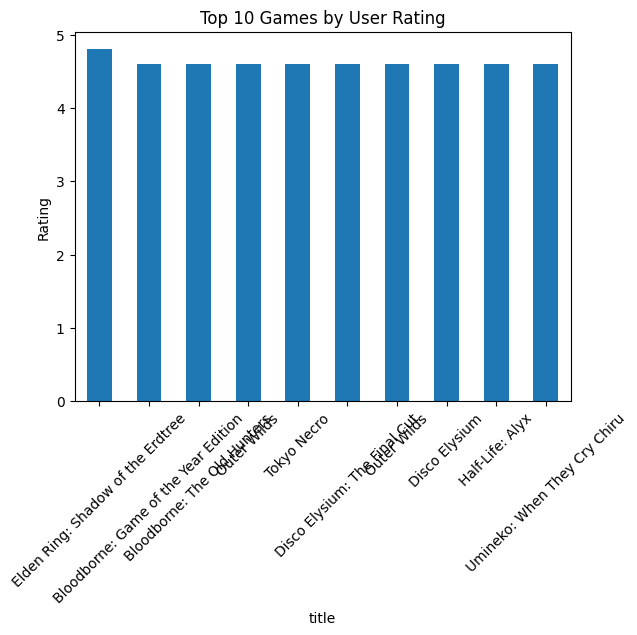

In [ ]:
# 1. Top-rated games by user reviews
top_games = df2[['title', 'rating']].sort_values('rating', ascending=False).head(10)
top_games.plot(kind='bar', x='title', y='rating', title='Top 10 Games by User Rating', legend=False)
plt.xticks(rotation=45)
plt.ylabel('Rating')
plt.show()

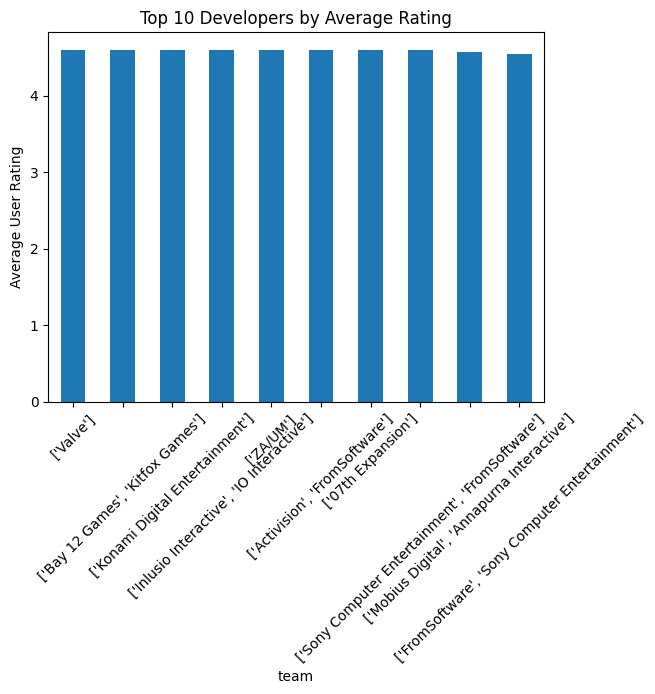

In [ ]:
# 2. Developers with highest average ratings
dev_ratings = df2.groupby('team')['rating'].mean().sort_values(ascending=False).head(10)
dev_ratings.plot(kind='bar', title='Top 10 Developers by Average Rating')
plt.ylabel('Average User Rating')
plt.xticks(rotation=45)
plt.show()

<ipython-input-16-c048607bf18e>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['plays'].fillna(0, inplace=True)


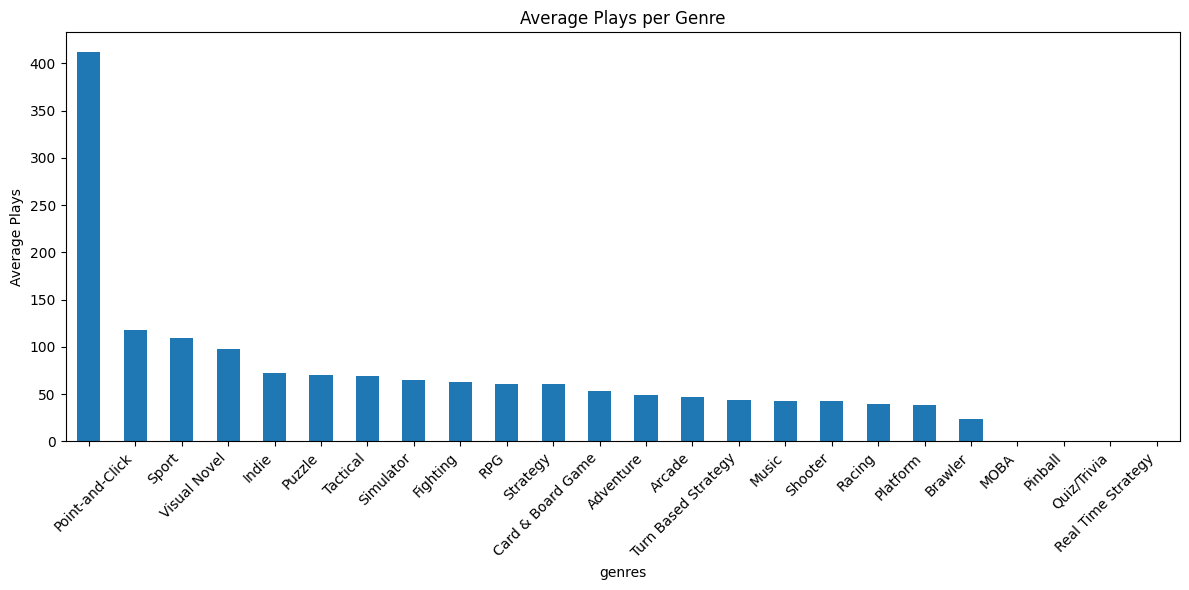

In [ ]:
# 3. Most common genres
# Remove brackets and quotes, then split by comma
df2['genres'] = df2['genres'].astype(str).str.strip("[]").str.replace("'", "")
df2['genres'] = df2['genres'].str.split(',')

# Explode to make one row per genre
df2 = df2.explode('genres')

# Clean whitespace
df2['genres'] = df2['genres'].str.strip()

# --- FIX START ---
# Ensure 'plays' column is numeric before calculating the mean
df2['plays'] = pd.to_numeric(df2['plays'], errors='coerce')
# Fill any NaNs created by coercion with 0 (though fillna was done before, this is a safety measure)
df2['plays'].fillna(0, inplace=True)
# --- FIX END ---

# Now redo the plot
plt.figure(figsize=(12, 6))
df2.groupby('genres')['plays'].mean().sort_values(ascending=False).plot(kind='bar', title='Average Plays per Genre')
plt.ylabel('Average Plays')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


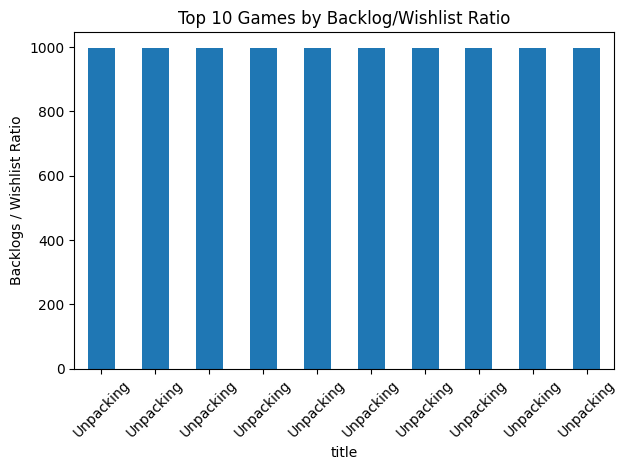

In [ ]:
#4 Ensure numeric conversion
df2['backlogs'] = pd.to_numeric(df2['backlogs'], errors='coerce')
df2['wishlist'] = pd.to_numeric(df2['wishlist'], errors='coerce')

# Fill NaNs (safe method)
df2['backlogs'] = df2['backlogs'].fillna(0)
df2['wishlist'] = df2['wishlist'].fillna(0)

# Compute ratio
df2['backlog_wishlist_ratio'] = df2['backlogs'] / (df2['wishlist'] + 1)

# Top 10 games with highest ratio
top_backlog = df2.sort_values('backlog_wishlist_ratio', ascending=False).head(10)

# Plot
x_col = 'name' if 'name' in top_backlog.columns else 'title' if 'title' in top_backlog.columns else None

if x_col:
    top_backlog.plot(kind='bar', x=x_col, y='backlog_wishlist_ratio', title='Top 10 Games by Backlog/Wishlist Ratio', legend=False)
    plt.xticks(rotation=45)
    plt.ylabel('Backlogs / Wishlist Ratio')
    plt.tight_layout()
    plt.show()
else:
    print("Neither 'name' nor 'title' column found for plotting.")


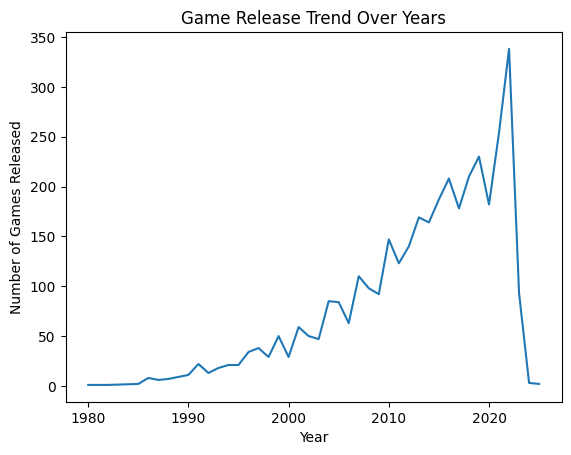

In [ ]:
# 5. Game release trend across years
release_trend =df2['release_year'].value_counts().sort_index()
release_trend.plot(kind='line', title='Game Release Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.show()


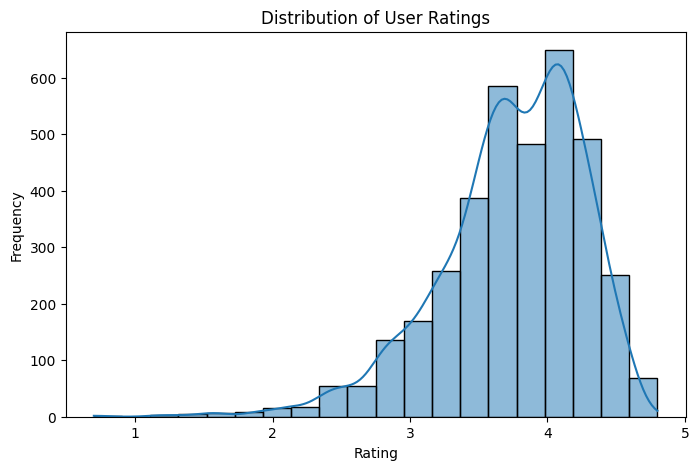

In [ ]:
# 6. Distribution of user ratings
plt.figure(figsize=(8,5))
sns.histplot(df2['rating'], bins=20, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

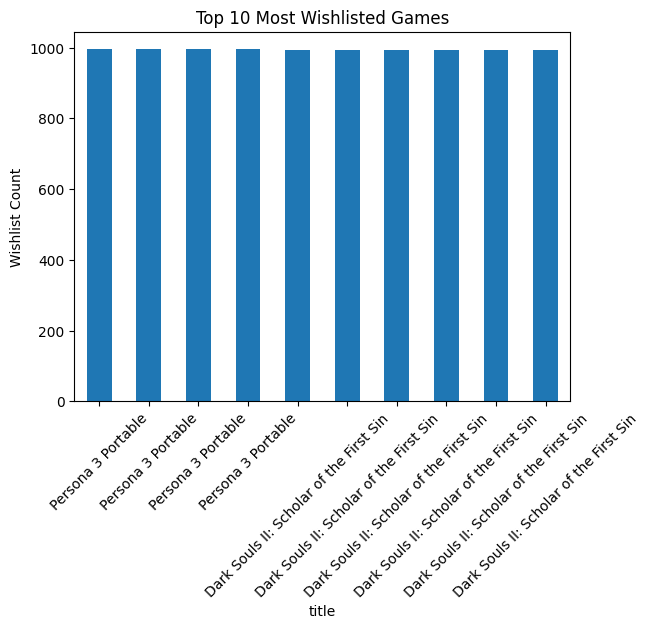

In [ ]:
# 7. Top 10 most wishlisted games
top_wishlist = df2[['title', 'wishlist']].sort_values('wishlist', ascending=False).head(10)
top_wishlist.plot(kind='bar', x='title', y='wishlist', title='Top 10 Most Wishlisted Games', legend=False)
plt.xticks(rotation=45)
plt.ylabel('Wishlist Count')
plt.show()

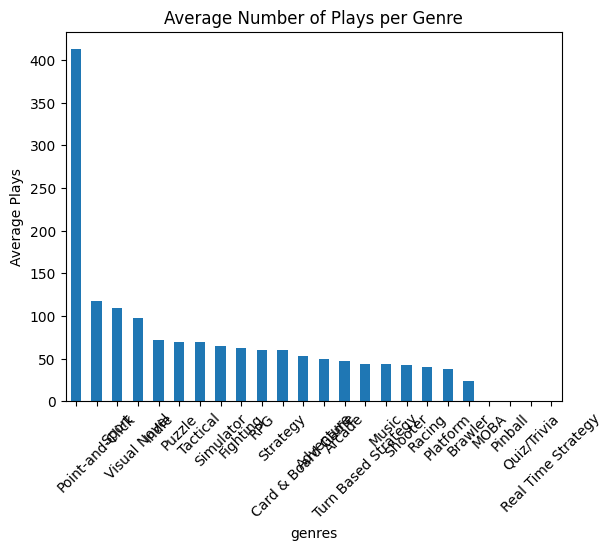

In [ ]:
# 8. Average number of plays per genre
# Correct the column name from 'number_of_plays' to 'plays'
avg_plays = df2.groupby('genres')['plays'].mean().sort_values(ascending=False)
avg_plays.plot(kind='bar', title='Average Number of Plays per Genre')
plt.ylabel('Average Plays')
plt.xticks(rotation=45)
plt.show()

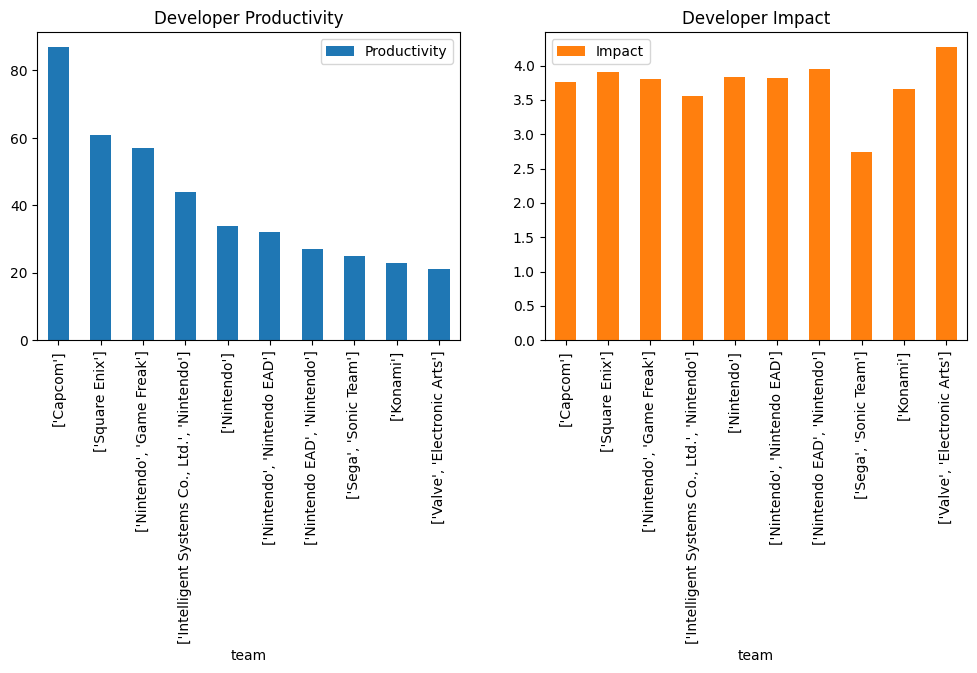

In [ ]:
# 9. Most productive & impactful developer studios
# Correct column names from 'developer' to 'team' and 'user_rating' to 'rating'
dev_productivity = df2.groupby('team').size()
dev_impact = df2.groupby('team')['rating'].mean()
dev_stats = pd.DataFrame({'Productivity': dev_productivity, 'Impact': dev_impact}).sort_values(['Productivity', 'Impact'], ascending=False).head(10)
dev_stats.plot(kind='bar', subplots=True, layout=(1,2), figsize=(12,4), title=['Developer Productivity', 'Developer Impact'])
plt.show()

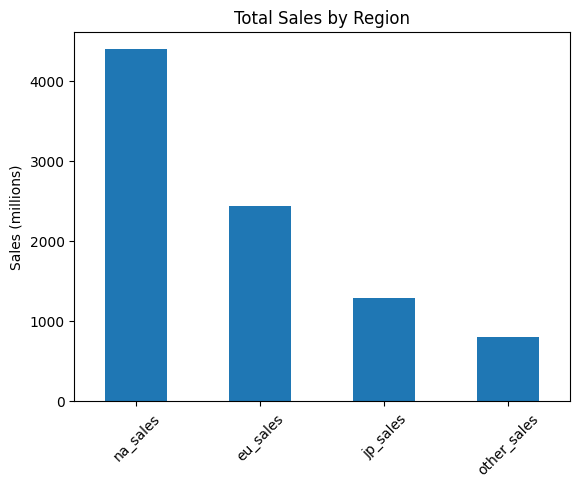

In [ ]:
# 10. Region generating most sales
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
region_sales = df1[regions].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', title='Total Sales by Region')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)
plt.show()

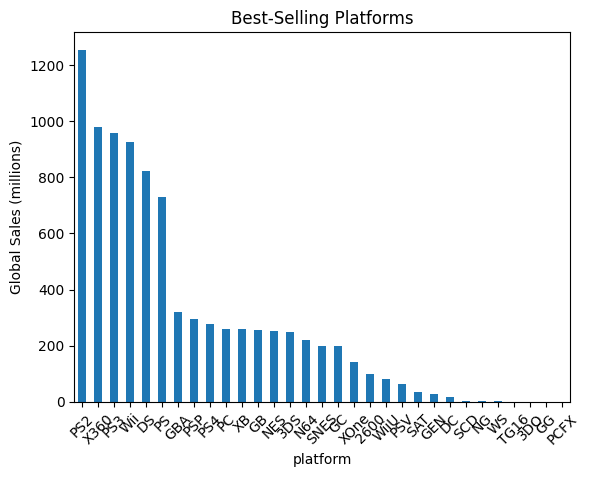

In [ ]:
# 11. Best-selling platforms
platform_sales = df1.groupby('platform')['global_sales'].sum().sort_values(ascending=False)
platform_sales.plot(kind='bar', title='Best-Selling Platforms')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=45)
plt.show()

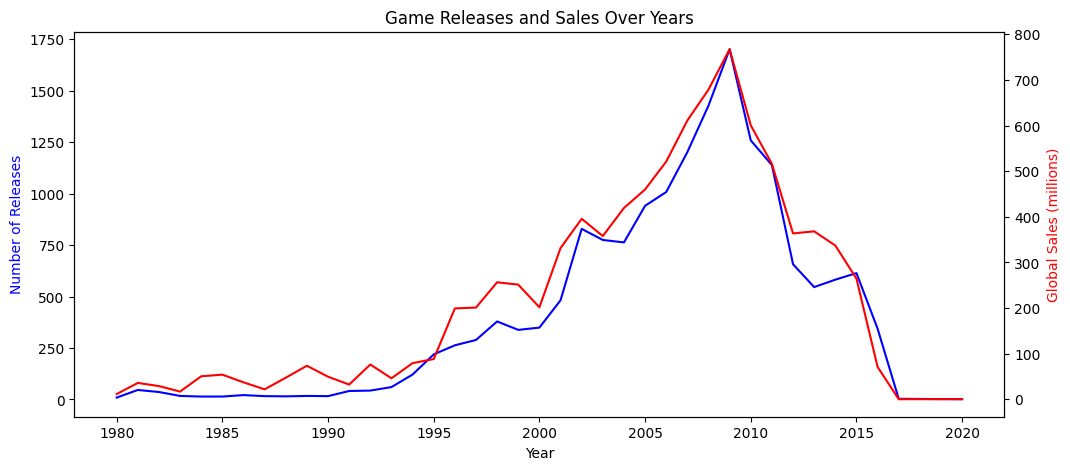

In [ ]:
# 12. Trend of game releases and sales over years
release_counts = df1['year'].value_counts().sort_index()
sales_per_year = df1.groupby('year')['global_sales'].sum()

fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(release_counts.index, release_counts.values, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Releases', color='blue')
ax2 = ax1.twinx()
ax2.plot(sales_per_year.index, sales_per_year.values, color='red')
ax2.set_ylabel('Global Sales (millions)', color='red')
plt.title('Game Releases and Sales Over Years')
plt.show()

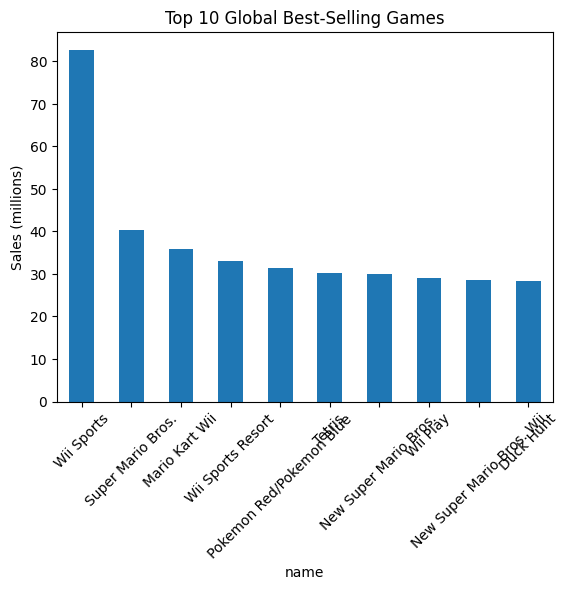

In [ ]:
# 13. Top 10 best-selling games globally
top_games = df1[['name', 'global_sales']].sort_values('global_sales', ascending=False).head(10)
top_games.plot(kind='bar', x='name', y='global_sales', title='Top 10 Global Best-Selling Games', legend=False)
plt.xticks(rotation=45)
plt.ylabel('Sales (millions)')
plt.show()

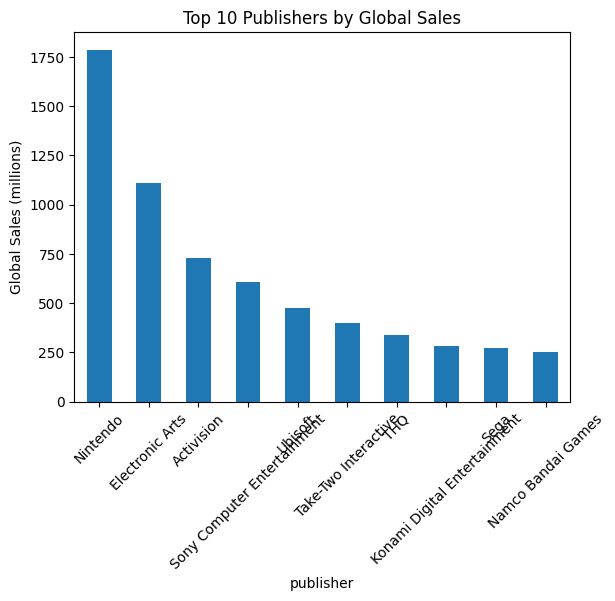

In [ ]:
# 14. Top publishers by sales
publisher_sales = df1.groupby('publisher')['global_sales'].sum().sort_values(ascending=False).head(10)
publisher_sales.plot(kind='bar', title='Top 10 Publishers by Global Sales')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=45)
plt.show()


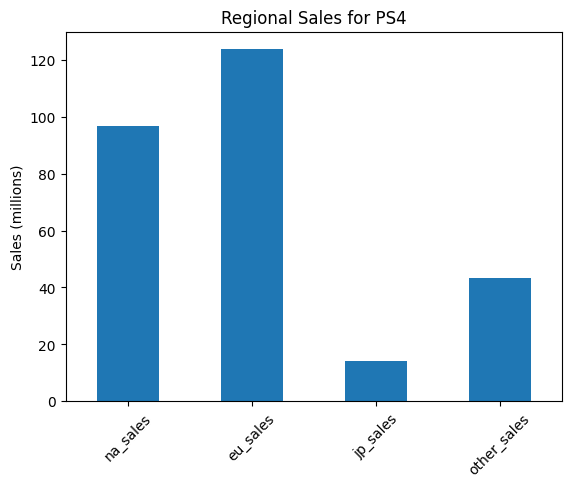

In [ ]:
# 15. Regional sales comparison for specific platform (example: 'PS4')
platform = 'PS4'
regional_platform_sales = df1[df1['platform'] == platform][regions].sum()
regional_platform_sales.plot(kind='bar', title=f'Regional Sales for {platform}')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)
plt.show()

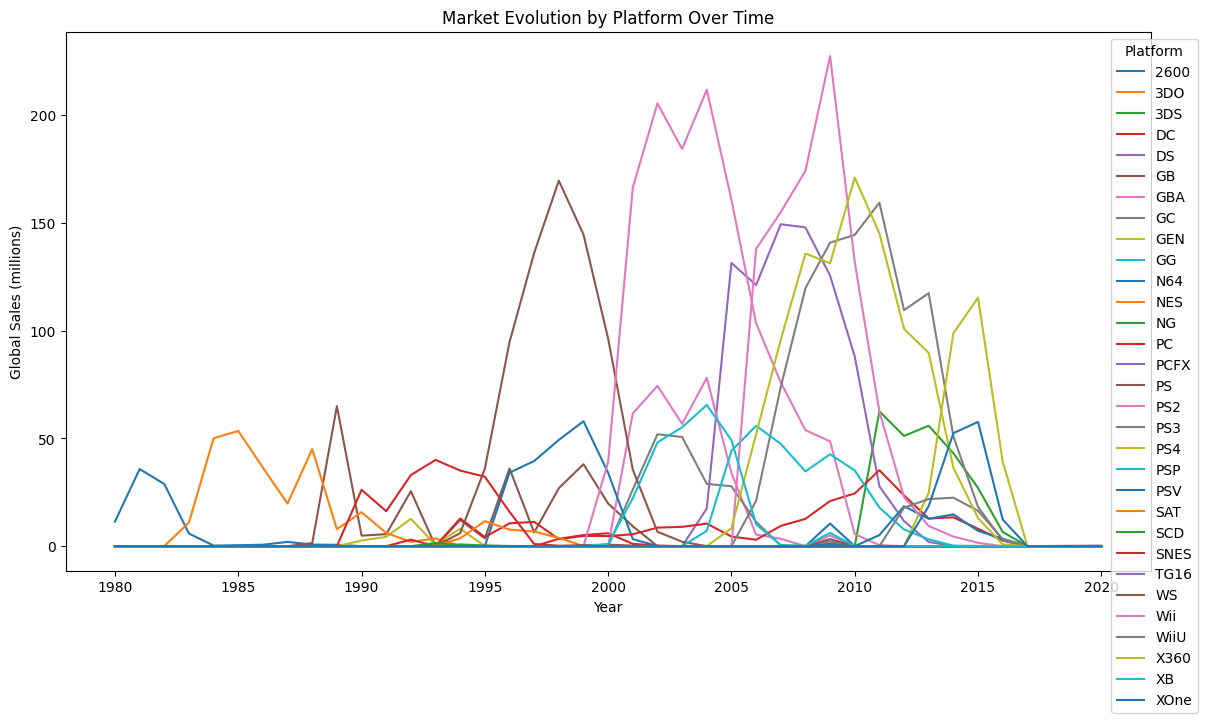

In [ ]:
# 16. Market evolution by platform over time
platform_year_sales = df1.groupby(['year', 'platform'])['global_sales'].sum().unstack().fillna(0)
platform_year_sales.plot(figsize=(14,7))
plt.title('Market Evolution by Platform Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1))
plt.show()


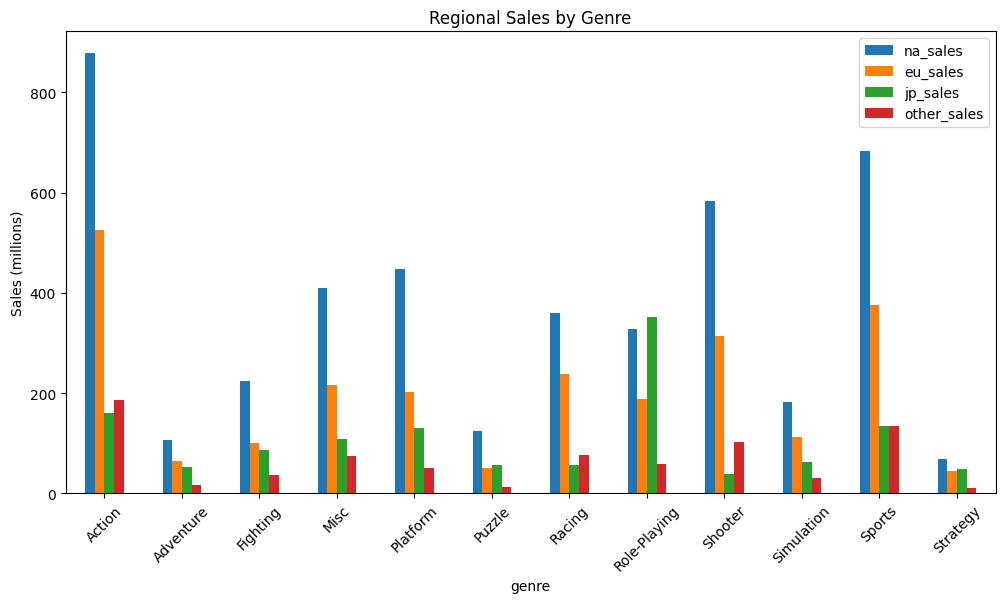

In [ ]:
# 17. Regional genre preferences
genre_region_sales = df1.groupby('genre')[regions].sum()
genre_region_sales.plot(kind='bar', figsize=(12,6))
plt.title('Regional Sales by Genre')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)
plt.show()

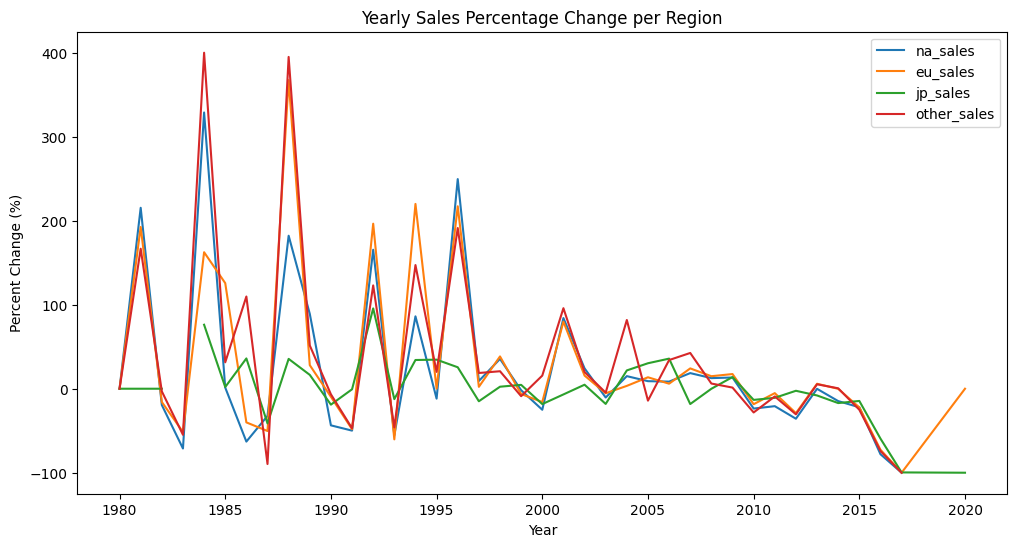

In [ ]:
# 18. Yearly sales change per region
sales_per_year = df1.groupby('year')[regions].sum()
sales_pct_change = sales_per_year.pct_change().fillna(0) * 100
sales_pct_change.plot(kind='line', figsize=(12,6))
plt.title('Yearly Sales Percentage Change per Region')
plt.ylabel('Percent Change (%)')
plt.xlabel('Year')
plt.show()

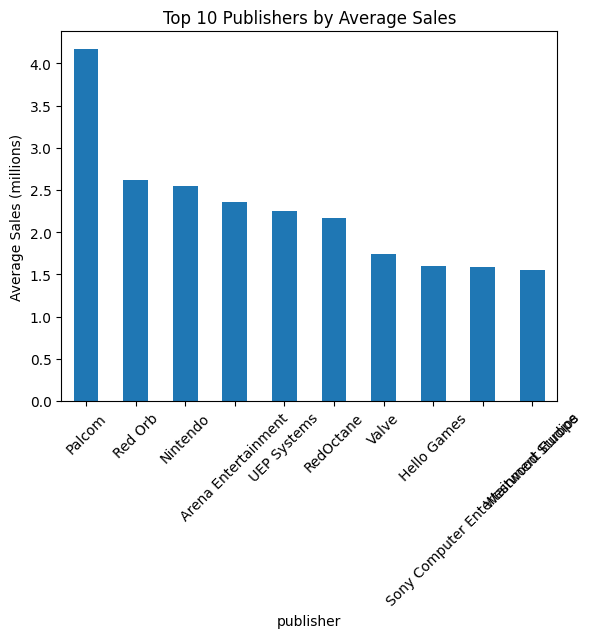

In [ ]:
# 19. Average sales per publisher
avg_sales_pub = df1.groupby('publisher')['global_sales'].mean().sort_values(ascending=False).head(10)
avg_sales_pub.plot(kind='bar', title='Top 10 Publishers by Average Sales')
plt.ylabel('Average Sales (millions)')
plt.xticks(rotation=45)
plt.show()

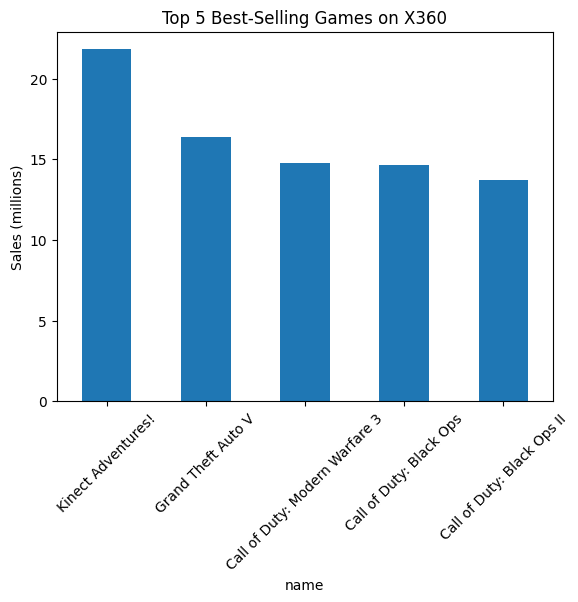

In [ ]:
# 20. Top 5 best-selling games per platform (example: 'X360')
platform = 'X360'
top5_platform = df1[df1['platform'] == platform].sort_values('global_sales', ascending=False).head(5)
top5_platform.plot(kind='bar', x='name', y='global_sales', title=f'Top 5 Best-Selling Games on {platform}', legend=False)
plt.xticks(rotation=45)
plt.ylabel('Sales (millions)')
plt.show()


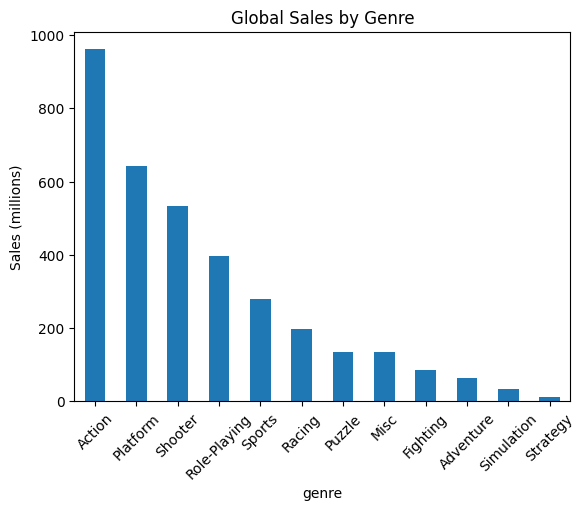

In [ ]:
# 21. Genres generating most global sales
genre_sales = merged_df.groupby('genre')['global_sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind='bar', title='Global Sales by Genre')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)
plt.show()

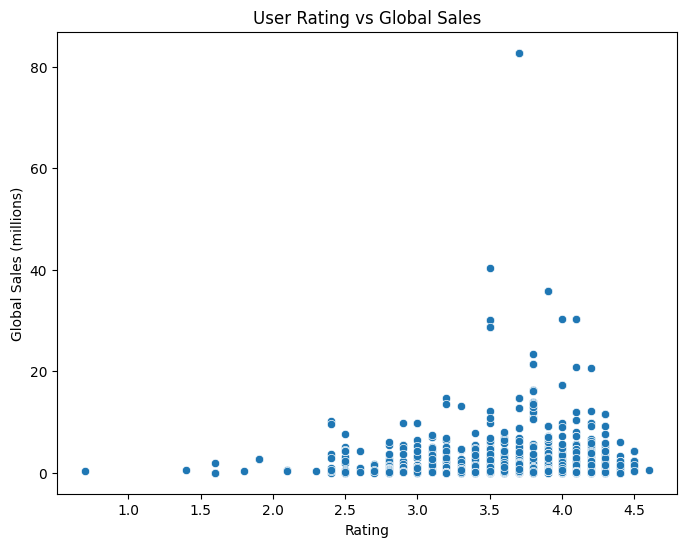

In [ ]:
# 22. User rating vs global sales
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x='rating', y='global_sales')
plt.title('User Rating vs Global Sales')
plt.xlabel('Rating')
plt.ylabel('Global Sales (millions)')
plt.show()

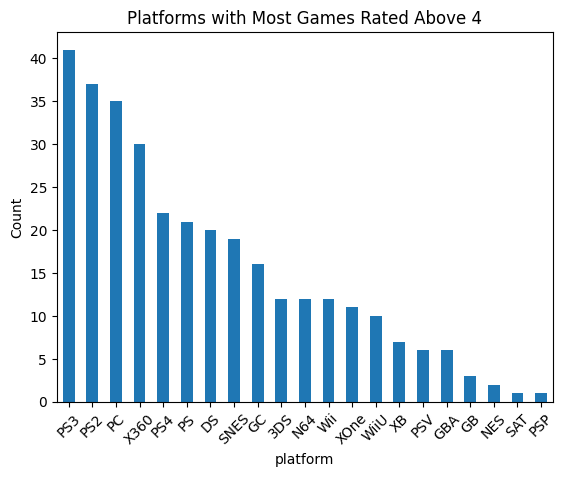

In [ ]:
# 23. Platforms with most games rated above 4
high_rated = merged_df[merged_df['rating'] > 4]
platform_high_rated = high_rated['platform'].value_counts()
platform_high_rated.plot(kind='bar', title='Platforms with Most Games Rated Above 4')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

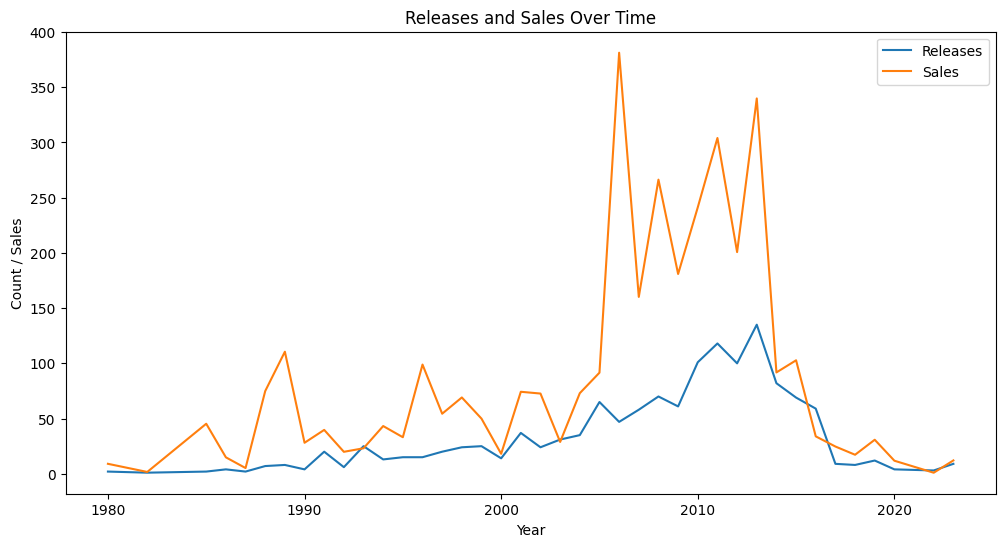

In [ ]:
# 24. Trend of releases and sales over time
release_counts = merged_df['release_year'].value_counts().sort_index()
sales_per_year = merged_df.groupby('release_year')['global_sales'].sum()
plt.figure(figsize=(12,6))
plt.plot(release_counts.index, release_counts.values, label='Releases')
plt.plot(sales_per_year.index, sales_per_year.values, label='Sales')
plt.title('Releases and Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Count / Sales')
plt.legend()
plt.show()

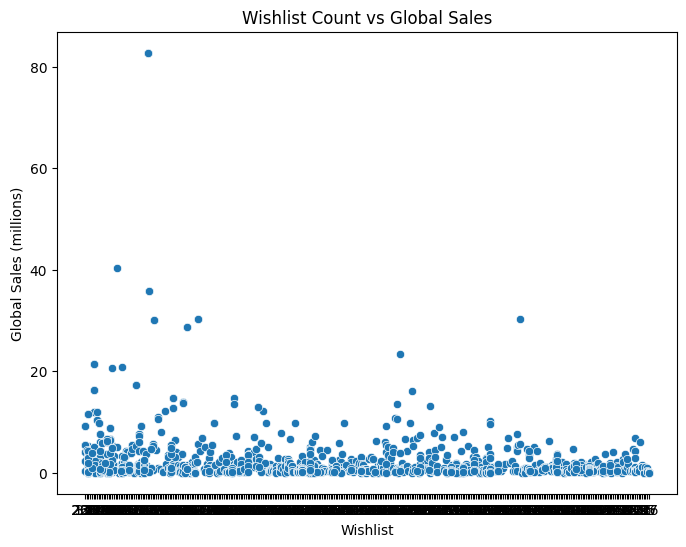

In [ ]:
# 25. Wishlist vs global sales
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x='wishlist', y='global_sales')
plt.title('Wishlist Count vs Global Sales')
plt.xlabel('Wishlist')
plt.ylabel('Global Sales (millions)')
plt.show()

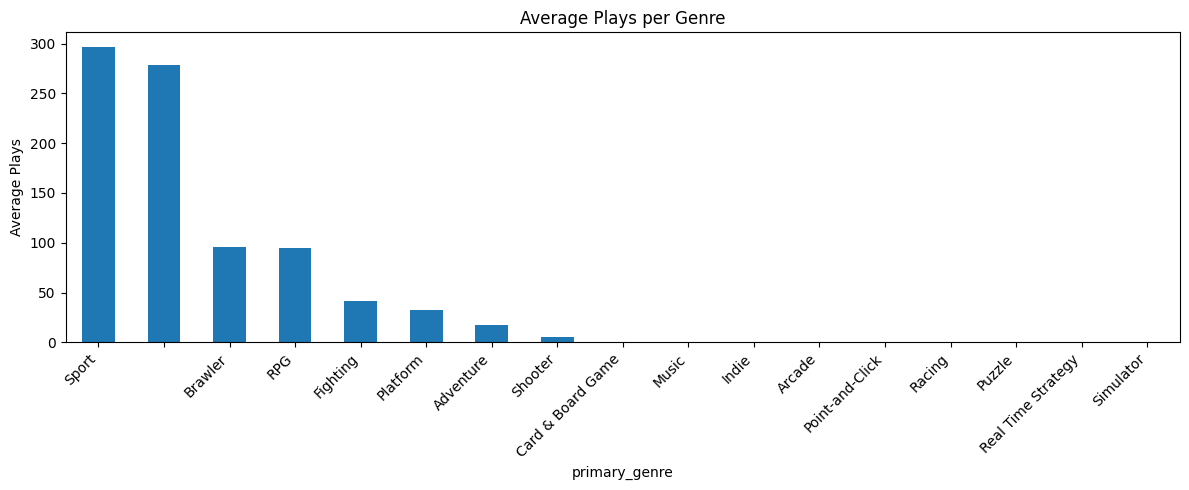

In [ ]:
# 26. Genres with highest engagement but lowest sales (plays / sales ratio)
# Correct the column name from 'number_of_plays' to 'plays'
# Ensure the 'plays' column in merged_df is numeric
# Make sure 'genres' is string and extract the primary genre
merged_df['genres'] = merged_df['genres'].astype(str).str.replace(r"[\[\]']", "", regex=True)
merged_df['primary_genre'] = merged_df['genres'].str.split(',').str[0].str.strip()

# Convert 'plays' to numeric and fill NaN with 0
merged_df['plays'] = pd.to_numeric(merged_df['plays'], errors='coerce')
merged_df['plays'] = merged_df['plays'].fillna(0)

# Calculate average plays per primary genre
genre_plays = merged_df.groupby('primary_genre')['plays'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 5))
genre_plays.plot(kind='bar', title='Average Plays per Genre')
plt.ylabel("Average Plays")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


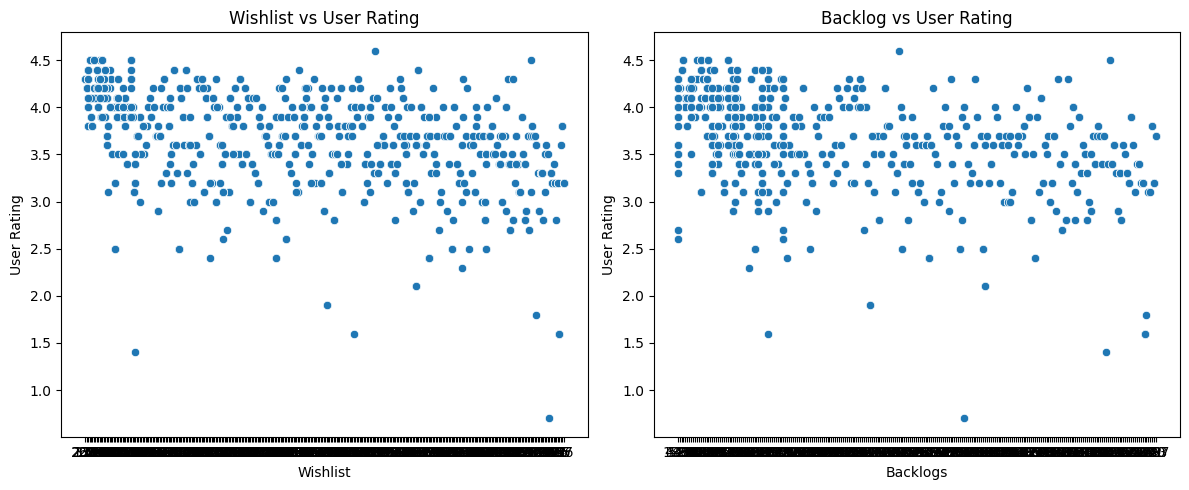

In [ ]:
# 27. Wishlist/backlog vs ratings correlation
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(data=merged_df, x='wishlist', y='rating')
plt.title('Wishlist vs User Rating')
plt.xlabel('Wishlist')
plt.ylabel('User Rating')
plt.subplot(1,2,2)
# Change 'backlog' to 'backlogs' to match the column name in merged_df
sns.scatterplot(data=merged_df, x='backlogs', y='rating')
plt.title('Backlog vs User Rating')
plt.xlabel('Backlogs') # Also update the xlabel for clarity
plt.ylabel('User Rating')
plt.tight_layout()
plt.show()

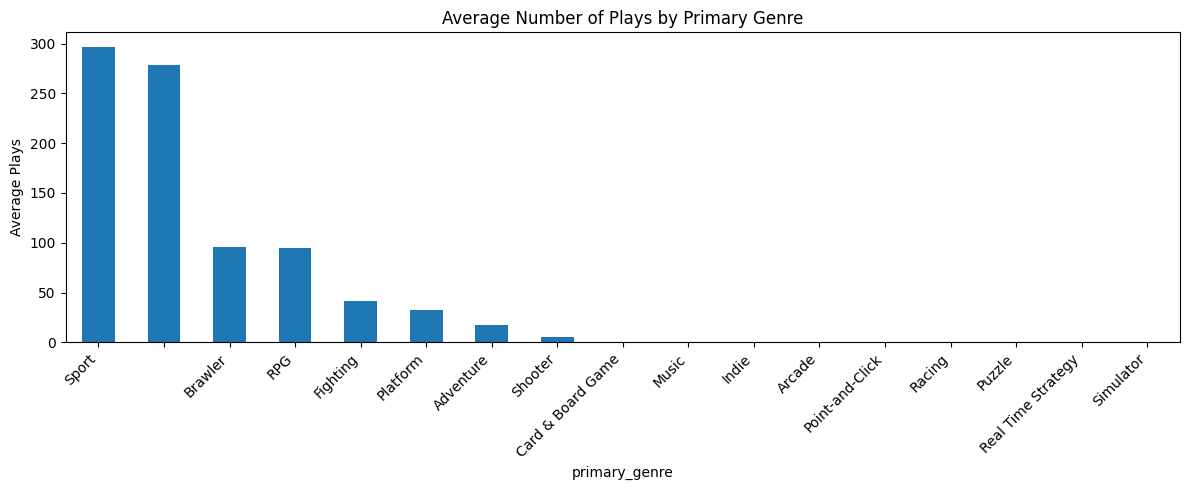

In [ ]:
#28.Ensure 'genres' is string, clean, and extract primary genre
merged_df['genres'] = merged_df['genres'].astype(str).str.replace(r"[\[\]']", "", regex=True)
merged_df['primary_genre'] = merged_df['genres'].str.split(',').str[0].str.strip()

# Group by primary genre
engagement_by_genre = merged_df.groupby('primary_genre')['plays'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 5))
engagement_by_genre.plot(kind='bar', title='Average Number of Plays by Primary Genre')
plt.ylabel('Average Plays')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

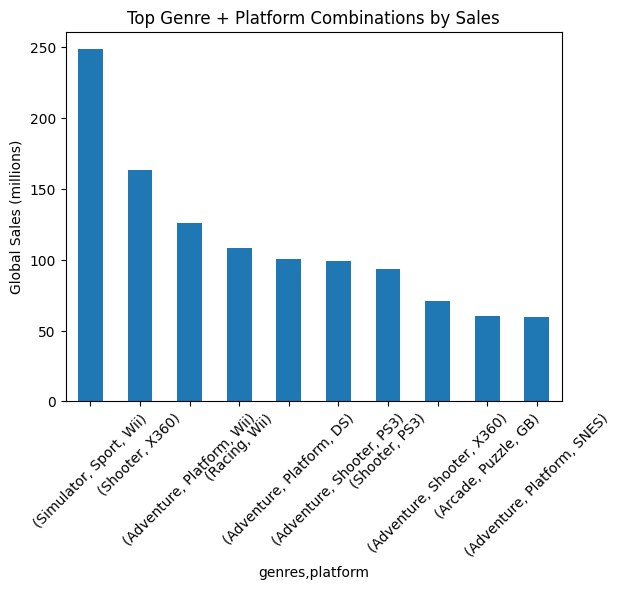

In [ ]:
# 29. Top-performing Genre + Platform combinations
combo_sales = merged_df.groupby(['genres', 'platform'])['global_sales'].sum()
combo_sales = combo_sales.sort_values(ascending=False).head(10)
combo_sales.plot(kind='bar', title='Top Genre + Platform Combinations by Sales')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=45)
plt.show()


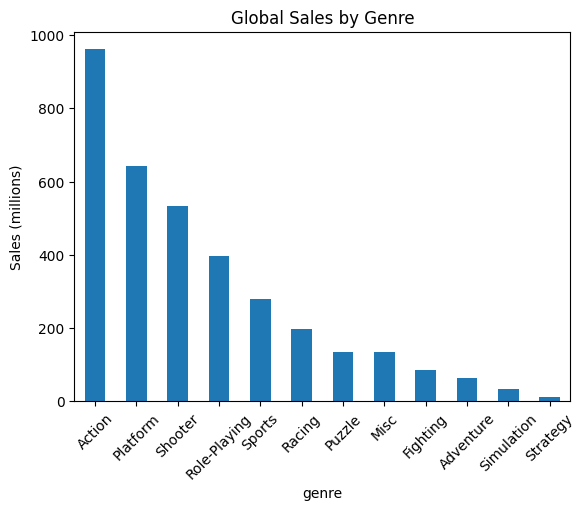

In [ ]:
# 30. Regional sales heatmap by genre
region_cols = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
# 21. Genres generating most global sales
genre_sales = merged_df.groupby('genre')['global_sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind='bar', title='Global Sales by Genre')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)
plt.show()

In [49]:
!sudo mysql -u root -p

Enter password: 
Welcome to the MySQL monitor.  Commands end with ; or \g.
Your MySQL connection id is 36
Server version: 8.0.42-0ubuntu0.22.04.1 (Ubuntu)

Copyright (c) 2000, 2025, Oracle and/or its affiliates.

Oracle is a registered trademark of Oracle Corporation and/or its
affiliates. Other names may be trademarks of their respective
owners.

Type 'help;' or '\h' for help. Type '\c' to clear the current input statement.

mysql> exit
Bye


In [53]:
import mysql.connector
import pandas as pd
from datetime import datetime

# Load the dataset
games = pd.read_csv('/content/drive/MyDrive/games.csv')

# Print columns to verify structure
print("Original columns in games DataFrame:", games.columns)

# Step 1: Create the database if it doesn't exist
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="your_new_password"
)
cursor = conn.cursor()
cursor.execute("CREATE DATABASE IF NOT EXISTS vgdb")
print("Database created or already exists.")
cursor.close()
conn.close()

# Step 2: Connect to the vgdb database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="your_new_password",
    database="vgdb"
)
cursor = conn.cursor()

# Step 3: Create the 'games' table with proper schema
cursor.execute("DROP TABLE IF EXISTS games")
cursor.execute("""
    CREATE TABLE IF NOT EXISTS games (
        id INT AUTO_INCREMENT PRIMARY KEY,
        title VARCHAR(255),
        rating FLOAT,
        genres VARCHAR(255),
        plays BIGINT,
        backlogs INT,
        wishlist INT,
        release_date DATE,
        team VARCHAR(100)
    )
""")
print("Table 'games' created or recreated with updated schema.")

# Step 4: Clean and prepare data

# Select relevant columns
expected_columns = ['Title', 'Rating', 'Genres', 'Plays', 'Backlogs', 'Wishlist', 'Release Date', 'Team']
games = games[expected_columns]

# Rename columns to match SQL table schema
column_mapping = {
    'Title': 'title',
    'Rating': 'rating',
    'Genres': 'genres',
    'Plays': 'plays',
    'Backlogs': 'backlogs',
    'Wishlist': 'wishlist',
    'Release Date': 'release_date',
    'Team': 'team'
}
games = games.rename(columns=column_mapping)

# Convert release_date to datetime, coerce errors to NaT
games['release_date'] = pd.to_datetime(games['release_date'], errors='coerce')

# Convert plays to numeric and handle NaNs
games['plays'] = pd.to_numeric(games['plays'], errors='coerce').fillna(0).astype(int)

# Convert 'Backlogs' and 'Wishlist' values with K/M to numeric integers
def convert_k_m(value):
    if isinstance(value, str):
        value = value.strip()
        if value.upper().endswith('K'):
            return float(value[:-1]) * 1000
        elif value.upper().endswith('M'):
            return float(value[:-1]) * 1000000
    try:
        return float(value)
    except:
        return 0

games['backlogs'] = games['backlogs'].apply(convert_k_m).fillna(0).astype(int)
games['wishlist'] = games['wishlist'].apply(convert_k_m).fillna(0).astype(int)

# Step 5: Insert data into MySQL table
sql_columns_order = ['title', 'rating', 'genres', 'plays', 'backlogs', 'wishlist', 'release_date', 'team']
games_for_sql = games[sql_columns_order]

inserted_rows = 0

for _, row in games_for_sql.iterrows():
    row_tuple = tuple(
        r.date() if isinstance(r, pd.Timestamp) and not pd.isna(r) else (None if pd.isna(r) else r)
        for r in row
    )
    try:
        cursor.execute("""
            INSERT INTO games (title, rating, genres, plays, backlogs, wishlist, release_date, team)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
        """, row_tuple)
        inserted_rows += 1
    except mysql.connector.Error as err:
        print(f"Error inserting row: {row_tuple}")
        print(f"Error: {err}")
        conn.rollback()
        continue

conn.commit()
print(f"Inserted {inserted_rows} rows into the games table.")

# Cleanup
cursor.close()
conn.close()


Original columns in games DataFrame: Index(['Unnamed: 0', 'Title', 'Release Date', 'Team', 'Rating', 'Times Listed',
       'Number of Reviews', 'Genres', 'Summary', 'Reviews', 'Plays', 'Playing',
       'Backlogs', 'Wishlist'],
      dtype='object')
Database created or already exists.
Table 'games' created or recreated with updated schema.
Inserted 1512 rows into the games table.
